In [191]:
from scipy import optimize, stats, interpolate, fftpack

import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pylab
%matplotlib inline



1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



32.97
32.97989844019469


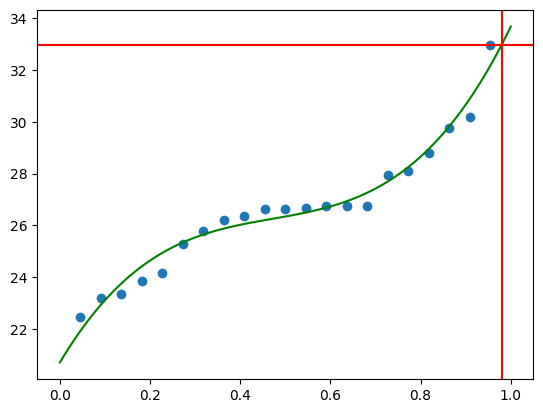

In [192]:
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]

# cprob = np.array(range(0, years_nb))/(years_nb+1) # I think this is the right one
cprob = np.array(range(1, years_nb+1))/(years_nb+1)
max_speeds = np.sort(max_speeds)
plt.scatter(cprob, max_speeds)

quantile_func = interpolate.UnivariateSpline(cprob, np.sort(max_speeds))
x = np.linspace(0, 1, 100)
plt.plot(x, quantile_func(x), c='g')

fifty_prob = 1. - 0.02
fifty_wind = quantile_func(fifty_prob)
plt.axvline(fifty_prob, c='r')
plt.axhline(fifty_wind, c='r')
print(max(max_speeds))
print(fifty_wind)


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

[15.7793274  23.09208185  5.73581616  2.29443448]
[-61.3209378   52.64929254   6.16452587   1.97590025]


Ttest_indResult(statistic=10.97184688722018, pvalue=2.175972509181154e-10)

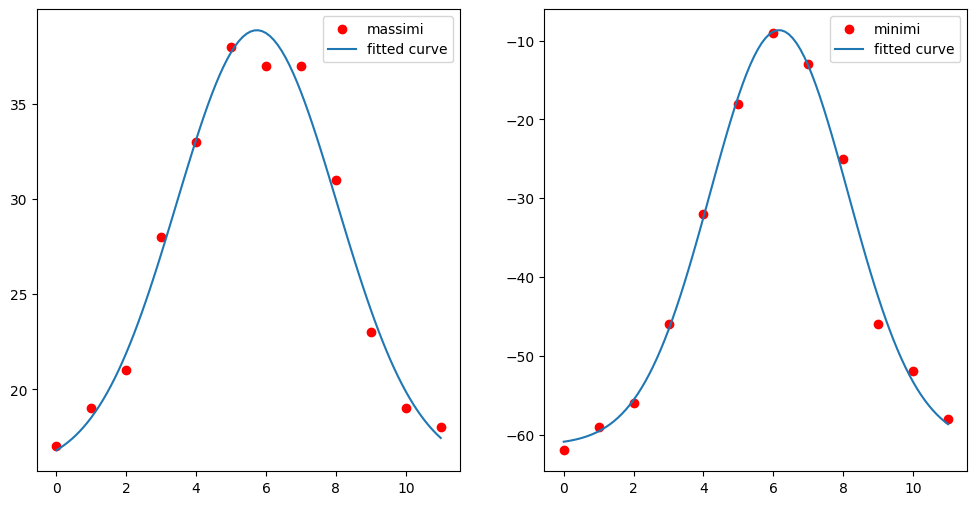

In [193]:
maxima = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
minima = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

x = np.linspace(0, len(maxima)-1, 100)

params, params_covariance = optimize.curve_fit(gauss, range(0, len(maxima)), maxima, p0=[-60, 50, 6, 2])
ax0.scatter(range(0, len(maxima)), maxima, label = 'massimi', c='r')
ax0.plot(x, gauss(x, params[0], params[1], params[2], params[3]), label='fitted curve')
ax0.legend()

print(params)

params, params_covariance = optimize.curve_fit(gauss, range(0, len(minima)), minima, p0=[-60, 50, 6, 2])
ax1.scatter(range(0, len(minima)), minima, label = 'minimi', c='r')
ax1.plot(x, gauss(x, params[0], params[1], params[2], params[3]), label='fitted curve')
ax1.legend()

print(params)
# The plot seem reasonable, exept for the fact that there seem to be two maxima in the maxima

stats.ttest_ind(maxima, minima)
# The result of the t-test says that they are not compatible


3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


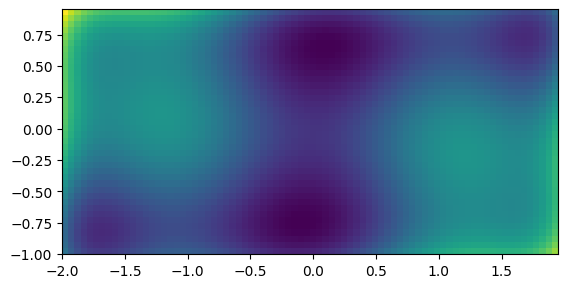

[-0.08984198  0.71265633]


In [194]:
# Define the function
def f(x, y):
    return ((4 - 2.1*x**2 + x**4/3)*x**2 + x*y + (4*y**2 - 4)*y**2)
# To evaluate the minima in multiple dimensions, better to use lambda functions
fun = lambda x: (4 - 2.1*x[0]**2 + x[0]**4/3)*x[0]**2 + x[0]*x[1] + (4*x[1]**2 - 4)*x[1]**2

# Define the dimension of analisys
X = np.arange(-2, 2, 0.05)
Y = np.arange(-1, 1, 0.05)
X, Y = np.meshgrid(X, Y)

# Visually see the function in that region
pylab.imshow(f(X, Y), extent=[np.min(X), np.max(X), np.min(Y), np.max(Y)], interpolation='nearest')
plt.show()

# Find the minima
x_init = [-1, -1]
solution = optimize.minimize(fun, x_init)
print(solution.x)

# For different initial guess, the two minima found are:
# [ 0.08984197, -0.71265635] (upper one)
# [-0.08984198,  0.71265633] (lower one)
# But for the initial guess [0, 0], the output is exactly [0, 0]

[-0.08984197]


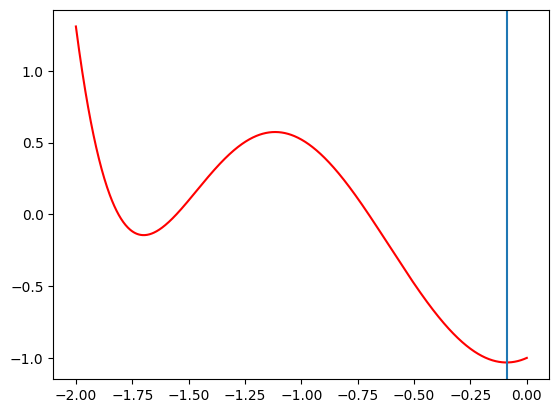

In [195]:
# CHECK THR SOLUTION USING MATHEMATICA AND IN ONE DIMENSION
# One can use the method given by Scipy
from scipy.optimize import basinhopping

def f(x, y):
    return ((4 - 2.1*x**2 + x**4/3)*x**2 + x*y + (4*y**2 - 4)*y**2)

margin_up = 0
margin_down = -2
x = np.linspace(margin_down, margin_up, 1000)
y = np.linspace(margin_down, margin_up, 1000)

x0, y0 = -0.089842, 0.712656 # Found using mathematica
solution = basinhopping(f, x0, stepsize=1, minimizer_kwargs={'args': (y0,)})

plt.plot(x, f(x, y0),'r-')
plt.axvline(solution.x)
print(solution.x)


4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

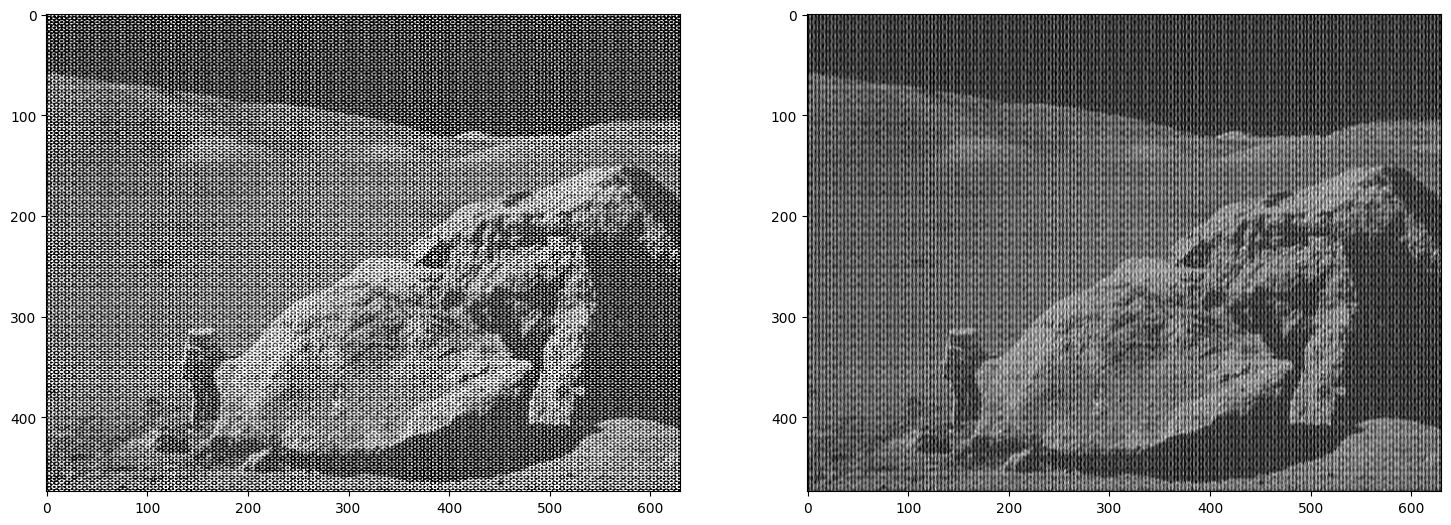

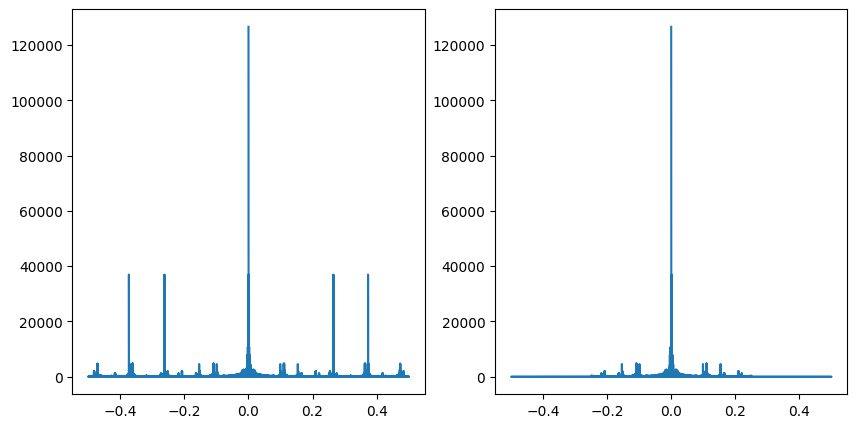

<Figure size 600x500 with 0 Axes>

In [274]:
# Load the data image (matrix)
sig = pylab.imread("moonlanding.png")

# Show the initial result of the data in a good picture
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))
# fig0 = plt.figure(figsize=(20, 15))
ax0.imshow(sig,interpolation='bilinear', cmap=plt.cm.gray)

# Perform a 2-D fft taking the real part
sig_fft = fftpack.fft2(sig)
power = np.abs(sig_fft)
# The corresponding frequencies are
sample_freq = fftpack.fftfreq(sig.size)
power = power.reshape(sample_freq.shape)
# There is a problem visualizing the spectrum: the power have been reshaped because of their incompatibile shape

# Plot the FFT power w.r.t. frequency
fig1, (ax2, ax3) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax2.plot(sample_freq, power)

# Deleting the troubling part of the signal through slicing
max_freq = 0.25
power[np.abs(sample_freq) > max_freq] = 0

# Plot the FFT power w.r.t. frequency (after the remotion of the high frequencies noise)
ax3.plot(sample_freq, power)

# And then removing it also from the signal
sig_fft[np.abs(sample_freq.reshape(sig_fft.shape)) > max_freq] = 0

# Apply the inverse fft
inverse = fftpack.ifft2(sig_fft)
fig3 = plt.figure(figsize=(6, 5))
ax1.imshow(np.abs(inverse),interpolation='bilinear', cmap=plt.cm.gray)


Text(0, 0.5, 'plower')

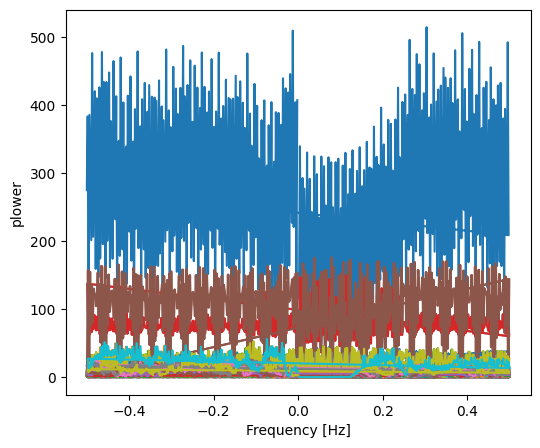

In [220]:
# Performing a FFT for each line of the image (WRONG)
# Load the data image (matrix)
sig = pylab.imread("moonlanding.png")

# Perform a 2-D fft taking the real part
sig_fft = fftpack.fft(sig)
power = np.abs(sig_fft)

# The corresponding frequencies are
sample_freq = fftpack.fftfreq(sig.size)
sample_freq = sample_freq.reshape(power.shape)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')
